Importing libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.options.mode.chained_assignment = None

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
df.rename(columns={0:'ispoisonous',5:'odor',4:'bruises'}, inplace=True)
df.head()

,ispoisonous,1,2,3,bruises,odor,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
df2 = df[['ispoisonous','odor','bruises']]
df2.head()

,ispoisonous,odor,bruises
0,p,p,t
1,e,a,t
2,e,l,t
3,p,p,t
4,e,n,f


Replacing values to numeric ones:
ispoisonous: p=1,e=0
bruises: t=1,f=0
odor: a=1 ,l = 2,c = 3, y = 4, f = 5,  m = 6, n = 7, p = 8, s = 9

In [37]:
df2['ispoisonous'] = df2['ispoisonous'].replace('p',1)
df2['ispoisonous'] = df2['ispoisonous'].replace('e',0)
df2['bruises'] = df2['bruises'].replace('t',1)
df2['bruises'] = df2['bruises'].replace('f',0)
df2['odor'] = df2['odor'].replace('a',1)
df2['odor'] = df2['odor'].replace('l',2)
df2['odor'] = df2['odor'].replace('c',3)
df2['odor'] = df2['odor'].replace('y',4)
df2['odor'] = df2['odor'].replace('f',5)
df2['odor'] = df2['odor'].replace('m',6)
df2['odor'] = df2['odor'].replace('n',7)
df2['odor'] = df2['odor'].replace('p',8)
df2['odor'] = df2['odor'].replace('s',9)
df2.head()

,ispoisonous,odor,bruises
0,1,8,1
1,0,1,1
2,0,2,1
3,1,8,1
4,0,7,0


Data analysis

In [26]:
df2.describe()

,ispoisonous,odor,bruises
count,8124.000000,8124.000000,8124.000000
mean,0.482029,5.788282,0.415559
std,0.499708,1.983678,0.492848
min,0.000000,1.000000,0.000000
25%,0.000000,5.000000,0.000000
50%,0.000000,7.000000,0.000000
75%,1.000000,7.000000,1.000000
max,1.000000,9.000000,1.000000


In [35]:
df2.groupby('odor').sum()

,ispoisonous,bruises
odor,,
1,0,400
2,0,400
3,192,0
4,576,0
5,2160,288
6,36,0
7,120,2032
8,256,256
9,576,0


In [36]:
df2.groupby('bruises').sum()

,ispoisonous,odor
bruises,,
0,3292,28112
1,624,18912


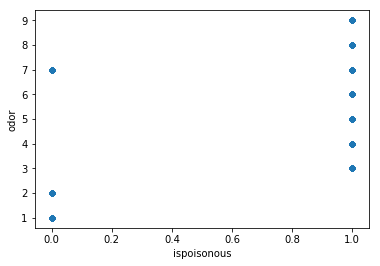

In [32]:
df2.plot(kind='scatter',x='ispoisonous',y='odor')

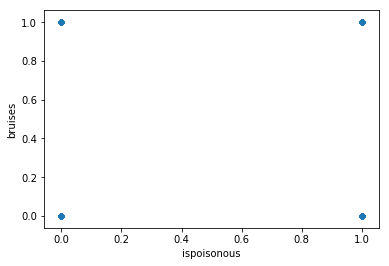

In [33]:
df2.plot(kind='scatter',x='ispoisonous',y='bruises')

In my conclusion I can see that when mushroom has no bruises it is more likely to be edible. There are no poisonous mushrooms with almond or anise odor. Most mushrooms that have mousty odor are poisonous.